# Colouring matrices

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.patches as patches

import sys
import sympy
import math
from sympy import *
from sympy.abc import x, n, z, t, k
from sympy.core.cache import *
    
clear_cache()    
    
init_printing(use_latex='mathjax') # for nice printing, a-la' TeX

sys.setrecursionlimit(100000)

plt.rcParams['figure.figsize'] = (10.0, 10.0)

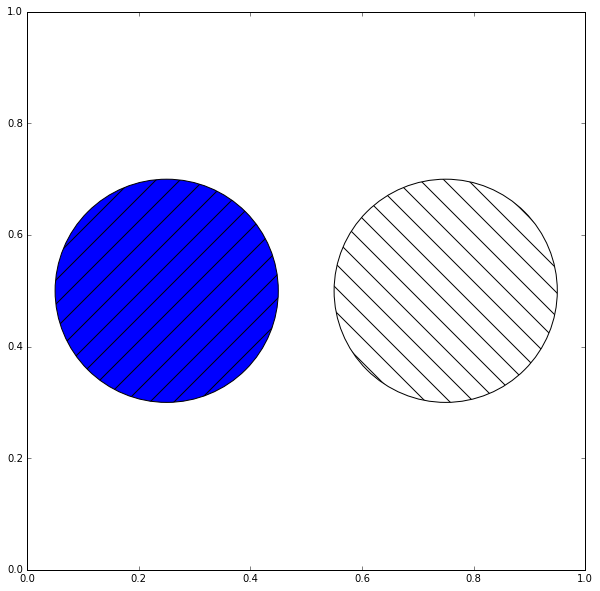

In [2]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(111, aspect='equal')
for p in [
    patches.Circle(
        (0.25, 0.5), 0.2,
        hatch='/'
    ),
    patches.Circle(
        (0.75, 0.5), 0.2,
        hatch='\\',
        fill=False
    ),
]:
    ax3.add_patch(p)
fig3.savefig('circle3.svg', dpi=90, bbox_inches='tight')

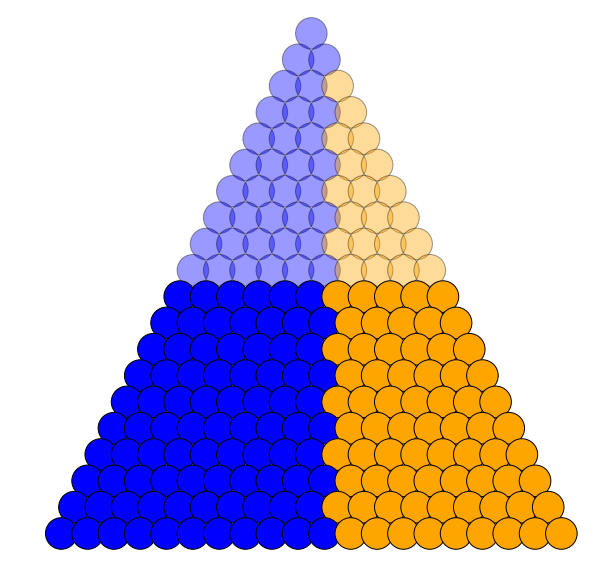

In [14]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(111, aspect='equal')

radius = .6
rows = 20
coordinates = []

for r in range(rows):
    for c in range(r+1):
        coordinates.append((-r/2+c, -r))
        #coordinates.append((c, -r))
        
        
for co in coordinates:
    c, r = co
    color = "orange" if c > -(-1)/2 else "blue"
    a = .4 if r > -rows/2 else 1
    circle = patches.Circle(co, radius, facecolor=color, alpha=a, fill=True) 
                            #joinstyle='miter',fill=False,hatch='*')
    #if c is -3: circle.set_visible(False)
    ax3.add_patch(circle)
    
ax3.set_xlim(-((rows+2*radius)/2),(rows+2*radius)/2)
ax3.set_ylim(-rows,1)
#ax3.set_autoscale_on(True)
ax3.set_axis_off()
fig3.savefig('circles.svg', dpi=600)#, bbox_inches='tight')

In [23]:
catalan_matrix = Matrix([
            [1,0,0,0,0,0],
            [1,1,0,0,0,0],
            [2,2,1,0,0,0],
            [5,5,3,1,0,0],
            [14,14,9,4,1,0],
            [42,42,28,14,5,1],
        ])
catalan_matrix

⎡1   0   0   0   0  0⎤
⎢                    ⎥
⎢1   1   0   0   0  0⎥
⎢                    ⎥
⎢2   2   1   0   0  0⎥
⎢                    ⎥
⎢5   5   3   1   0  0⎥
⎢                    ⎥
⎢14  14  9   4   1  0⎥
⎢                    ⎥
⎣42  42  28  14  5  1⎦

In [25]:
alpha = 2
bound = 2**alpha
catalan_matrix[:bound, :bound].applyfunc(lambda c: c % 2)

⎡1  0  0  0⎤
⎢          ⎥
⎢1  1  0  0⎥
⎢          ⎥
⎢0  0  1  0⎥
⎢          ⎥
⎣1  1  1  1⎦

In [28]:
def symbolic_matrix(dims, gen_coeff_symbol, rule, inits):
    return Matrix(*dims, lambda n,k:gen_coeff_symbol[n,k])

m_symbol = IndexedBase('m')
symbolic_matrix((10,10), m_symbol, None, None)

⎡m[0, 0]  m[0, 1]  m[0, 2]  m[0, 3]  m[0, 4]  m[0, 5]  m[0, 6]  m[0, 7]  m[0, 
⎢                                                                             
⎢m[1, 0]  m[1, 1]  m[1, 2]  m[1, 3]  m[1, 4]  m[1, 5]  m[1, 6]  m[1, 7]  m[1, 
⎢                                                                             
⎢m[2, 0]  m[2, 1]  m[2, 2]  m[2, 3]  m[2, 4]  m[2, 5]  m[2, 6]  m[2, 7]  m[2, 
⎢                                                                             
⎢m[3, 0]  m[3, 1]  m[3, 2]  m[3, 3]  m[3, 4]  m[3, 5]  m[3, 6]  m[3, 7]  m[3, 
⎢                                                                             
⎢m[4, 0]  m[4, 1]  m[4, 2]  m[4, 3]  m[4, 4]  m[4, 5]  m[4, 6]  m[4, 7]  m[4, 
⎢                                                                             
⎢m[5, 0]  m[5, 1]  m[5, 2]  m[5, 3]  m[5, 4]  m[5, 5]  m[5, 6]  m[5, 7]  m[5, 
⎢                                                                             
⎢m[6, 0]  m[6, 1]  m[6, 2]  m[6, 3]  m[6, 4]  m[6, 5